In [1]:
# Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# other
import missingno as msno
import joblib
import tarfile
import os
import urllib

### Scikit-learn

from sklearn import datasets

# Metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# Preprocessing & Imputing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Validating and Tuning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Algorithms
import xgboost
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

## Linear Regression using(Normal_eqn & G.D)

### Normal equation

$$thetas = (X^{T}X)^{-1}X^{T}y$$

In [2]:
### Assume some data

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

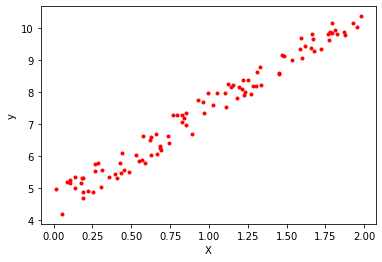

In [3]:
plt.plot(X, y, '.r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
### conctenate a column of ones in X to be in place of X0

X_new = np.insert(arr=X, values=1, obj=0, axis=1)

In [5]:
# thetas = (X^{T}X)^{-1}X^{T}y

thetas_normal = ((np.linalg.inv((X_new.T) @ X_new) @ X_new.T) @ y)
print('thetas_normal => \n', thetas_normal)

thetas_normal => 
 [[4.54872205]
 [2.94111301]]


y_predict_normal => 
 [[ 4.54872205]
 [10.43094808]]


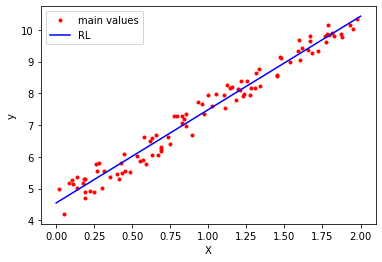

In [6]:
### Make prediction using this Method

X_test = np.array([[0], [2]])
X_test = np.insert(values=1, arr=X_test, axis=1, obj=0)  ## for x0

y_predict_normal = X_test @ thetas_normal

print('y_predict_normal => \n', y_predict_normal)

print('=='*20)

plt.plot(X, y, '.r', label='main values')
plt.plot(X_test[:,1], y_predict_normal, 'b-', label='RL')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Notes:

1. Linear Regression is based os least squares , which is implemented numpy
2. this function computes using (Moore-Penroso inverse) from (np.linalg.pinv())
3. this is also a technique of Factorization called (SVD *Singular Value Decomposition)
4. and this method which is implemented in LinearRegression Alg.

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
y_pred_lin_reg = lin_reg.predict(X_test[:,1].reshape(2,1))
print('y_pred_lin_reg => \n', y_pred_lin_reg)

y_pred_lin_reg => 
 [[ 4.54872205]
 [10.43094808]]


In [9]:
### check thetas using (np.linalg.lstsq) (close enough to normal eqn)

## first arary
print('out thetas implemented in Linear Regression => \n', np.linalg.lstsq(X_new, y, rcond=1e-6)[0])

out thetas implemented in Linear Regression => 
 [[4.54872205]
 [2.94111301]]


### Gradient Descent 

using metric of (MSE)

#### Batch GD

In [10]:
X_new.shape

(100, 2)

In [11]:
y_new = np.squeeze(y)
y_new.shape

(100,)

In [12]:
thetas_batch = np.zeros(X_new.shape[1])

In [13]:
def batch_GD(X, y, theta_input, alfa, iters):
    
    cost_steps = np.zeros(iters)
    theta_steps = np.zeros(iters*2).reshape(-1,2)
    
    for i in range(iters):
        
        h_theta = X @ theta_input
        
        loss = h_theta - y
        
        cost = np.sum(loss**2) / (2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        theta_input = theta_input - alfa * gradient
        
        
        # append in array
        theta_other = theta_input
        cost_steps[i] = cost
        theta_steps[i] = theta_other
        
    # return thetas final , thetas steps for each iteration , cost steps for each iteration
    return theta_input, theta_steps, cost_steps

In [14]:
theta_final_batch, theta_steps, cost_steps = batch_GD(X_new, y_new, thetas_batch, 0.1, 1000)
print('theta_final from batch GD =>', theta_final_batch)  ## at this eta (thetas are close enough)

theta_final from batch GD => [4.54872186 2.94111318]


In [15]:
y_predict_batch = X_test @ theta_final_batch
print('y_predict_batch => \n', y_predict_batch)

y_predict_batch => 
 [ 4.54872186 10.43094822]


#### Stochastic GD

In [16]:
thetas_stochastic = np.zeros(X_new.shape[1])

In [17]:
def stochastic_GD(X, y, thetas_stoch, alfa, epochs):
    
    cost_steps = np.zeros(epochs)
    theta_steps = np.zeros(epochs*2).reshape(-1,2)
    
    # one Epoch = loop on all Dataset Rows
    
    for i in range(epochs):
        
        cost = 0
        
        for j in range(len(X)):
            
            X_j = X[j,:].reshape(1,-1)
            h_theta = X_j @ thetas_stoch
            loss = h_theta - y[j]
            cost = np.sum(loss**2)
            gradient = (X_j.T) @ loss
            
            thetas_stoch = thetas_stoch - alfa * gradient
              
            cost += cost
            
        # append each epoch
        total_cost_each_epoch = cost / (2 * len(X))
        
        theta_tempor = thetas_stoch
        cost_steps[i] = total_cost_each_epoch
        theta_steps[i] = theta_tempor
            
    return thetas_stoch, theta_steps, cost_steps

In [18]:
thetas_stoch, theta_steps, cost_steps = stochastic_GD(X_new, y_new, 
                                                      thetas_stochastic, alfa=0.1, epochs=50)

print('thetas_stoch =>', thetas_stoch)

print('==='*20)

y_predict_stochastic = X_test @ thetas_stoch
print('y_predict_stochastic => \n', y_predict_stochastic)  ### close enough to above methods

thetas_stoch => [4.44569508 3.03743975]
y_predict_stochastic => 
 [ 4.44569508 10.52057458]


#### Mini-Batch GD

In [19]:
thetas_miniBatch = np.zeros(X_new.shape[1])

In [20]:
def mini_batch_GD(X, y, thetas_mini, alfa, epochs, batch_size):
    
    
    cost_steps = np.zeros(epochs)
    theta_steps = np.zeros(epochs*2).reshape(-1,2)
    
    num_batches = int(len(X) / batch_size)
    
  
    for j in range(epochs):
        
        begin = 0
        cost = 0
        
        for i in range(num_batches):
            
            X_batch = X[begin:begin+batch_size,:]
            y_batch = y[begin:begin+batch_size]

            h_theta = X_batch @ thetas_mini
            loss = h_theta - y_batch
            cost = np.sum(loss**2) / (2 * len(X_batch))
            gradient = (X_batch.T @ loss) / len(X_batch)

            thetas_mini = thetas_mini - alfa * gradient

            begin+=batch_size
            
            cost+=cost
        
        
        # append each epoch
        total_cost_each_epoch = cost
        
        theta_tempor = thetas_mini
        
        cost_steps[j] = total_cost_each_epoch
        theta_steps[j] = theta_tempor
            
        
    return thetas_mini, theta_steps, cost_steps

In [21]:
thetas_mini, theta_steps, cost_steps = mini_batch_GD(
                        X_new, y_new, thetas_miniBatch, alfa=0.1, epochs=50, batch_size=10)


print('thetas_mini =>', thetas_mini)

print('==='*20)

y_predict_miniBatch = X_test @ thetas_mini
print('y_predict_miniBatch => \n', y_predict_miniBatch)  ### close enough to above methods

thetas_mini => [4.5277991  2.93466764]
y_predict_miniBatch => 
 [ 4.5277991  10.39713439]


## Polynomial Regression

In [22]:
### New_data

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(100, 1)

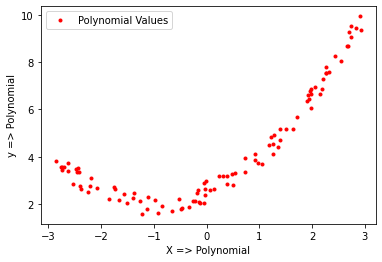

In [23]:
plt.plot(X, y, '.r', label='Polynomial Values')
plt.xlabel('X => Polynomial')
plt.ylabel('y => Polynomial')
plt.legend();

In [24]:
### make PolynomialFeatures

poly_feat = PolynomialFeatures(degree=2, include_bias=False)  # no bias column for x0 (False)

X_poly = poly_feat.fit_transform(X)

In [25]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)

LinearRegression()

In [26]:
score_lin_reg_poly = lin_reg_poly.score(X_poly, y)
print('score_lin_reg_poly => ', score_lin_reg_poly)

score_lin_reg_poly =>  0.9859967354477344


In [27]:
y_predict_poly = lin_reg_poly.predict(X_poly)

In [28]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)

In [29]:
## doing some tricks

X_grid = np.arange(min(X), max(X)+0.2, 0.1)
X_grid = X_grid.reshape(-1,1)

X_grid_poly = poly_feat.fit_transform(X_grid)
y_grid_poly = lin_reg_poly.predict(X_grid_poly)

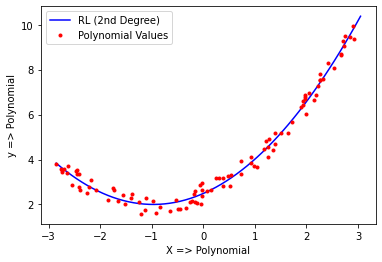

In [30]:
plt.plot(X_grid, y_grid_poly, 'b-', label='RL (2nd Degree)')
plt.plot(X, y, '.r', label='Polynomial Values')
plt.xlabel('X => Polynomial')
plt.ylabel('y => Polynomial')
plt.legend();

### Study the case of (trade-off between (bias & variance))

In [31]:
## get high bias by assuming simple Linear Regression with degree=1
## get high variance by assuming complex Regression with degree=300

In [32]:
## degree = 1

lin_reg_degree_1 = LinearRegression()
lin_reg_degree_1.fit(X, y)

y_predict_degree_1 = lin_reg_degree_1.predict(X)

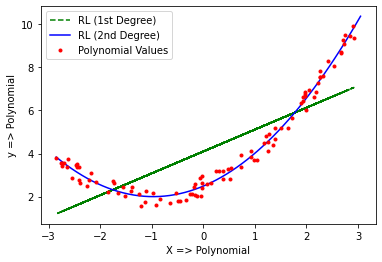

In [33]:
plt.plot(X, y_predict_degree_1, 'g--', label='RL (1st Degree)')
plt.plot(X_grid, y_grid_poly, 'b-', label='RL (2nd Degree)')
plt.plot(X, y, '.r', label='Polynomial Values')
plt.xlabel('X => Polynomial')
plt.ylabel('y => Polynomial')
plt.legend();

### Study trade-off between Underfitting & Overfitting

**for quadratic Data**  <br />
Study when degree =  1 >>> simple model ... High bias and Low variance >> Underfitting
Study when degree =  10 >>> compex model ... Low bias and High variance >> Overfitting


In [34]:
def plot_learning_curves(model, X, y):
    ''' this function is used to plot (size of training Data vs. RMSE) sequentially 
    '''
    train_errors = []
    val_errors = []
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)
    
    for i in range(1, len(X_train)):
        model.fit(X_train[:i], y_train[:i])
        y_train_predict = model.predict(X_train[:i])
        
        y_val_predict = model.predict(X_val[:i])
        
        train_errors.append(np.sqrt(mean_squared_error(y_train[:i], y_train_predict)))
        val_errors.append(np.sqrt(mean_squared_error(y_val[:i], y_val_predict)))
    
    plt.plot(train_errors, 'b-+', label='train')
    plt.plot(val_errors, 'r-', label='Val')
    plt.xlabel('Size of instances')
    plt.ylabel('RMSE')
    plt.axis([0,80,0,3])
    plt.legend()

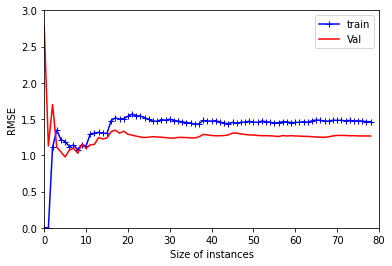

In [35]:
lin_reg_degree_1 = LinearRegression()

## call the function
plot_learning_curves(lin_reg_degree_1, X, y)

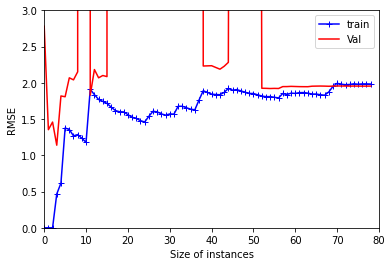

In [36]:
### degree of 300 for (overfitting)

poly_feat_300 = PolynomialFeatures(degree=300, include_bias=False)
X_poly_300 = poly_feat_300.fit_transform(X)

lin_reg_poly_300 = LinearRegression()

## call the function  (overfitting)
plot_learning_curves(lin_reg_poly_300, X_poly_300, y)

## Regularization

Regularization is used to control overfitting and complexity of model
1. Using Ridge or use SGD
2. Using Lasso or use SGD
3. Using Elastic Net

In [37]:
### New_data

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

#### First:  Ridge or Use SGD

* based on L2 Norm 
* increasing of alpha ... reducing overfitting and reducing complexity of model 
* leading to higher bias and lower variance
* High increase of alpha leads to Flat Line (Ver simple Model with High High bias)

###### Ridge

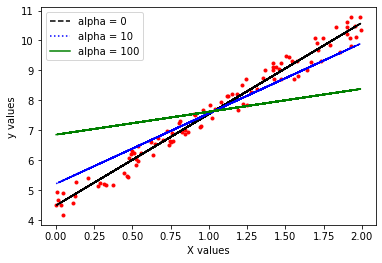

In [38]:
### using Ridge with diffrent alphas(0, 10, 100)

model_ridge_0 = Ridge(alpha=0)
model_ridge_0.fit(X, y)
y_predict_ridge_0 = model_ridge_0.predict(X)

#######################################

model_ridge_10 = Ridge(alpha=10)
model_ridge_10.fit(X, y)
y_predict_ridge_10 = model_ridge_10.predict(X)

#######################################

model_ridge_100 = Ridge(alpha=100)
model_ridge_100.fit(X, y)
y_predict_ridge_100 = model_ridge_100.predict(X)

#######################################

plt.plot(X, y, 'r.')
plt.plot(X, y_predict_ridge_0, 'k--', label='alpha = 0')
plt.plot(X, y_predict_ridge_10, 'b:', label='alpha = 10')
plt.plot(X, y_predict_ridge_100, 'g-', label='alpha = 100')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend();

##### SGDRegressor  (penalty='l2')


In [39]:
reg_sgd_0 = SGDRegressor(penalty='l2', alpha=0)
reg_sgd_0.fit(X, np.squeeze(y))
y_predict_sgd_0 = reg_sgd_0.predict(X)

#######################################

reg_sgd_10 = SGDRegressor(penalty='l2', alpha=10)
reg_sgd_10.fit(X, np.squeeze(y))
y_predict_sgd_10 = reg_sgd_10.predict(X)

#######################################

reg_sgd_100 = SGDRegressor(penalty='l2', alpha=100)
reg_sgd_100.fit(X, np.squeeze(y))
y_predict_sgd_100 = reg_sgd_100.predict(X)

#######################################


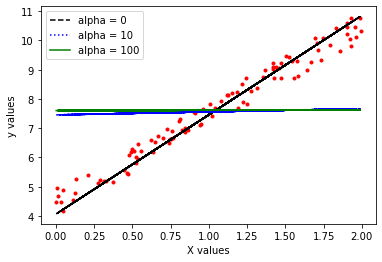

In [40]:
plt.plot(X, y, 'r.')
plt.plot(X, y_predict_sgd_0, 'k--', label='alpha = 0')
plt.plot(X, y_predict_sgd_10, 'b:', label='alpha = 10')
plt.plot(X, y_predict_sgd_100, 'g-', label='alpha = 100')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend();

#### Second:  Lasso or Use SGD

* based on L1 Norm 
* increasing of alpha ... reducing overfitting and reducing complexity of model 
* leading to higher bias and lower variance
* High increase of alpha leads to Flat Line (Ver simple Model with High High bias)

##### Lasso

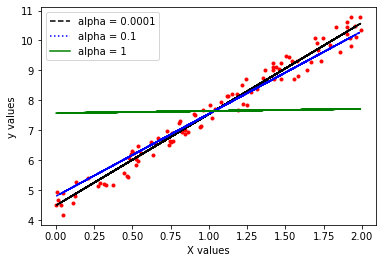

In [41]:
### using Lasso with diffrent alphas(0.0001, 0.1, 1)

model_lasso_0 = Lasso(alpha=0.0001)
model_lasso_0.fit(X, y)
y_predict_lasso_0 = model_lasso_0.predict(X)

#######################################

model_lasso_10 = Lasso(alpha=0.1)
model_lasso_10.fit(X, y)
y_predict_lasso_10 = model_lasso_10.predict(X)

#######################################

model_lasso_100 = Lasso(alpha=1)
model_lasso_100.fit(X, y)
y_predict_lasso_100 = model_lasso_100.predict(X)

#######################################

plt.plot(X, y, 'r.')
plt.plot(X, y_predict_lasso_0, 'k--', label='alpha = 0.0001')
plt.plot(X, y_predict_lasso_10, 'b:', label='alpha = 0.1')
plt.plot(X, y_predict_lasso_100, 'g-', label='alpha = 1')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend();

##### SGD (penalty='l1')

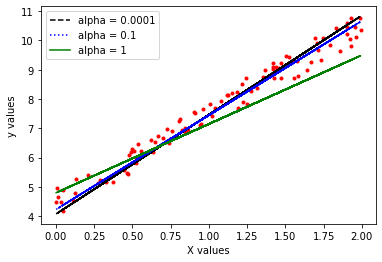

In [42]:
### using Lasso with diffrent alphas(0.0001, 0.1, 1)

model_sgd_0 = SGDRegressor(alpha=0.0001, penalty='l1')
model_sgd_0.fit(X, np.squeeze(y))
y_predict_sgd_0 = model_sgd_0.predict(X)

#######################################

model_sgd_10 = SGDRegressor(alpha=0.1, penalty='l1')
model_sgd_10.fit(X, np.squeeze(y))
y_predict_lasso_10 = model_sgd_10.predict(X)

#######################################

model_sgd_100 = SGDRegressor(alpha=1, penalty='l1')
model_sgd_100.fit(X, np.squeeze(y))
y_predict_sgd_100 = model_sgd_100.predict(X)

#######################################

plt.plot(X, y, 'r.')
plt.plot(X, y_predict_sgd_0, 'k--', label='alpha = 0.0001')
plt.plot(X, y_predict_lasso_10, 'b:', label='alpha = 0.1')
plt.plot(X, y_predict_sgd_100, 'g-', label='alpha = 1')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend();

#### Third:  Elastic_Net or Use SGD

* based on both L2 & L1 Norm with mix ratio (r)

In [43]:
reg_elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
reg_elastic.fit(X, y)

y_predict_elastic = reg_elastic.predict(X)

###########################################################################################

# l1_ratio > only when penalty='elasticnet'
reg_elastic_sgd = SGDRegressor(penalty='elasticnet', alpha=1.0, l1_ratio=0.5) 
reg_elastic_sgd.fit(X, np.squeeze(y))

y_predict_elastic_sgd = reg_elastic_sgd.predict(X)

###########################################################################################

### check similarity for both above methods using Elastic Net technique for Regularization
np.allclose(y_predict_elastic, y_predict_elastic_sgd, rtol=0.5)

True

### Some Notes about (Logistic Regression)

In [44]:
## load_iris_dataset

iris = datasets.load_iris()

In [45]:
iris_df = pd.DataFrame(np.c_[iris.data, iris.target], columns=iris.feature_names+['target'])

In [46]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [47]:
X = iris_df[['petal width (cm)']]
y = (iris_df['target']==2) ## Binary classification (true for virginica else false)

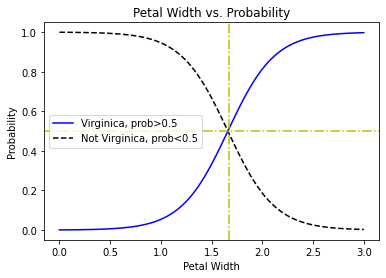

In [59]:
### Define LogisticRegression Alg.
### C & penalty are for regularization , but Note C is inverse of alpha
### increasing C >> reducing Rgularizarion and vice versa

log_reg = LogisticRegression(C=1.0, penalty='l2')
log_reg.fit(X, y)

### test new data
X_new_test = np.linspace(0, 3, 100).reshape(-1, 1)

## instead of predict use predict_proba
y_pred_proba_logistic = log_reg.predict_proba(X_new_test)

### plotting
### When probabilty is greater than 0.5 >> iris Virginica,, else >> Not Virginica
plt.plot(X_new_test, y_pred_proba_logistic[:,1], 'b-', label='Virginica, prob>0.5')
plt.plot(X_new_test, y_pred_proba_logistic[:,0], 'k--', label='Not Virginica, prob<0.5')

plt.axhline(y=0.5, color='y', linestyle='-.')
plt.axvline(x=1.66666667, color='y', linestyle='-.')
plt.xlabel('Petal Width')
plt.ylabel('Probability')
plt.title('Petal Width vs. Probability')
plt.legend(loc='center left')
plt.show()

### Try multi features with probabilities

In [60]:
X_multi = iris_df[['petal length (cm)', 'petal width (cm)']]
y_multi = (iris_df['target']==2) ## Binary classification (true for virginica else false)

In [61]:
log_reg_2 = LogisticRegression(penalty='l2', C=1.0)
log_reg_2.fit(X_multi, y_multi)
outs = log_reg_2.predict_proba(X_multi)

##########################################################
idx_11 = np.argmax(outs[:,1]>0.5)
print('idx prob = 0.5 =>', idx_11)
print('values petal (length & width) =>', X_multi.iloc[idx_11][0],'and' , X_multi.iloc[idx_11][1])

print('==='*20)
##########################################################
idx_22 = np.argmax(outs[:,1]>0.9)
print('idx prob = 0.9 =>', idx_22)
print('values petal (length & width) =>', X_multi.iloc[idx_22][0],'and' , X_multi.iloc[idx_22][1])

print('==='*20)
##########################################################
idx_33 = np.argmax(outs[:,1]>0.15)
print('idx prob = 0.15 =>', idx_33)
print('values petal (length & width) =>', X_multi.iloc[idx_33][0],'and' , X_multi.iloc[idx_33][1])


idx prob = 0.5 => 70
values petal (length & width) => 4.8 and 1.8
idx prob = 0.9 => 100
values petal (length & width) => 6.0 and 2.5
idx prob = 0.15 => 50
values petal (length & width) => 4.7 and 1.4


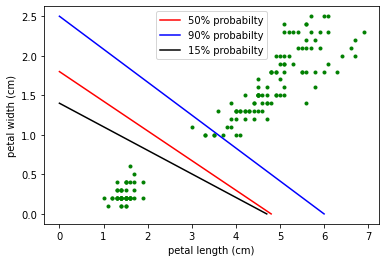

In [62]:
plt.plot(X_multi.iloc[:,0], X_multi.iloc[:,1], 'g.')
########################################################
v1 = [0, 4.8]
h1 = [1.8, 0]
plt.plot(v1, h1, 'r-', label='50% probabilty')
########################################################
v2 = [0, 6]
h2 = [2.5, 0]
plt.plot(v2, h2, 'b-', label='90% probabilty')
########################################################
v3 = [0, 4.7]
h3 = [1.4, 0]
plt.plot(v3, h3, 'k-', label='15% probabilty')


########################################################
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

## Try multiclassification Using Softmax Regression

**ordinary methods is to use (OVO or OVR)** <br />
**but we ca use softmax regression to support multiclassifcation in LogisticRegression**

In [63]:
X = iris_df.drop(columns=['target'], axis=1)
y = iris_df['target'] ## multi_class classimulti_classfication

In [64]:
multi_log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1.0, max_iter=1000)

In [65]:
multi_log_reg.fit(X, y)

LogisticRegression(max_iter=1000, multi_class='multinomial')

#### predict

In [68]:
y_predict_softmax = multi_log_reg.predict(X)

### Accuracy Metrics

In [69]:
score_soft = accuracy_score(y, y_predict_softmax)
print('score_soft =>', score_soft)

score_soft => 0.9733333333333334


class_report => 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.98      0.94      0.96        50
         2.0       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



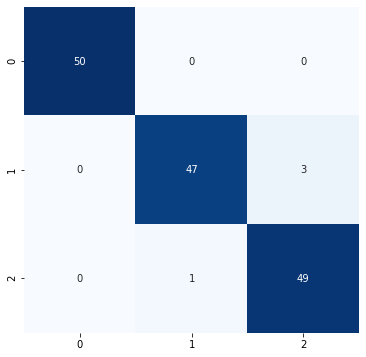

In [70]:
### Plotting confusion matrix

conf_matrix = confusion_matrix(y, y_predict_softmax)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues');

print('==='*20)

class_report = classification_report(y, y_predict_softmax)
print('class_report => \n', class_report) 
print('==='*20)

#### predict_proba

In [73]:
y_predict_proba_softmax = multi_log_reg.predict_proba(X)

In [74]:
df_scores = pd.DataFrame(y_predict_proba_softmax)
df_scores

,0,1,2
0,0.981588,0.018411,1.451470e-08
1,0.971361,0.028639,3.021119e-08
2,0.985292,0.014708,1.234368e-08
3,0.976095,0.023905,3.971674e-08
4,0.985240,0.014760,1.201615e-08
...,...,...,...
145,0.000056,0.080103,9.198411e-01
146,0.000227,0.251900,7.478733e-01
147,0.000138,0.157120,8.427416e-01
148,0.000046,0.038421,9.615331e-01


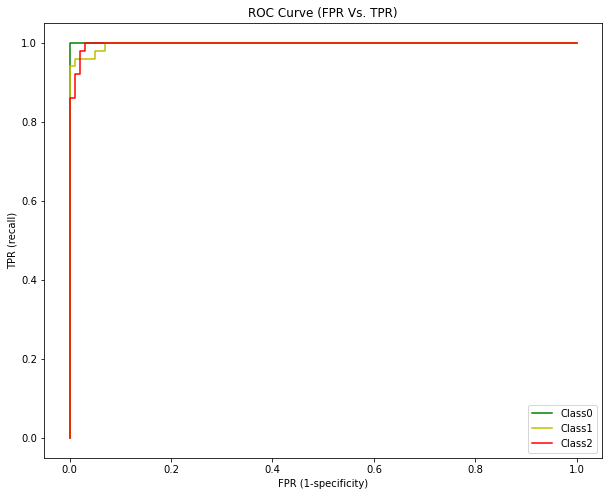

In [79]:
### plotting roc_curve
fpr_dict = {}
tpr_dict = {}
threshold_dict = {}

for i in range(3):
    fpr_dict[i], tpr_dict[i], threshold_dict[i] = roc_curve(y==i, df_scores.iloc[:,i])
    
##
plt.figure(figsize=(10,8))
colors = ['g','y','r']
for i in range(3):
    plt.plot(fpr_dict[i], tpr_dict[i], label=f'Class{i}', c=colors[i])
    
plt.xlabel('FPR (1-specificity)')
plt.ylabel('TPR (recall)')
plt.title('ROC Curve (FPR Vs. TPR)')
plt.legend()
plt.show()

In [80]:
auc_total = roc_auc_score(y, df_scores, multi_class='ovr')
print('auc_total =>', auc_total)

auc_total => 0.9983333333333334
